# Exploration
Here we will explore the results collected so far to understand them better using only explorative statistics.\
The following packages should be installed:
* pandas
* numpy
* matplotlib

Import necessary external packages.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Import the utility class from [experiment-evaluation](https://github.com/MarcRuble/experiment-evaluation).\
*Note: The file `exploration.py` needs to be in the same folder as this notebook.*

In [2]:
from exploration import DatasetExploration

Try out the utility functions.

4.107142857142857

2.0985654565453866

Condition
L      26
M      31
S      24
XL     25
XS     26
XXL    24
XXS    40
Name: Participant, dtype: int64

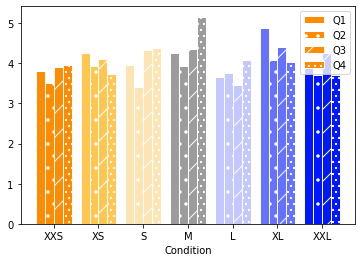

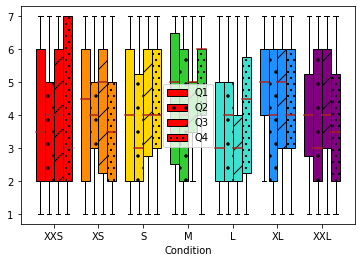

,Participant,Task,Condition,Q1,Q2,Q3,Q4,Score
110,12,2,XXS,7,7,7,6,6.75
160,5,1,XS,6,7,5,7,6.25
24,2,1,XL,6,6,6,7,6.25
46,10,2,XXL,7,6,7,5,6.25
78,2,2,XXS,7,5,6,7,6.25
...,...,...,...,...,...,...,...,...
153,14,1,L,2,1,2,3,2.00
30,5,1,XL,5,1,1,1,2.00
43,13,1,XXS,1,4,2,1,2.00
27,8,1,XXS,2,1,1,2,1.50


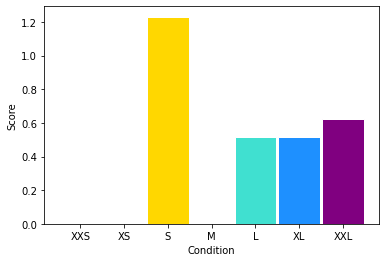

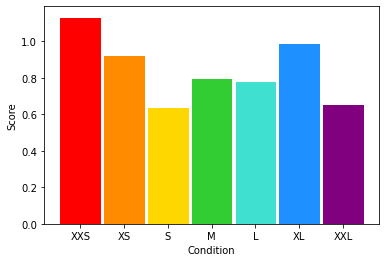

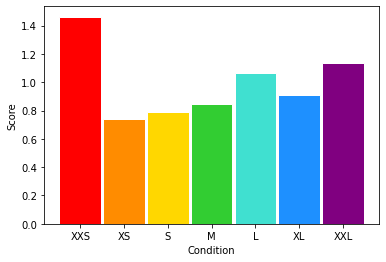

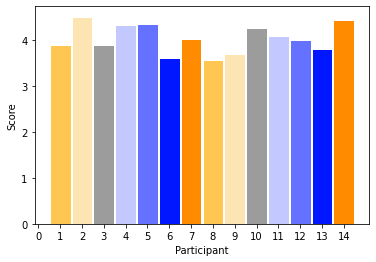

In [3]:
# read data
df = pd.read_csv("tables/results.csv")

# create object
expl = DatasetExploration(df)

# display quick stats
display(expl.mean('Q1'))
display(expl.std('Q4'))
display(expl.countsByProperty('Condition', 'Participant'))

# create barplot
expl.save_order('Condition', ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL'])
expl.save_colors(['#FF8B00', '#FFC752', '#FDE5B3', '#9C9C9D', '#C3C9FF', '#6572FF', '#0017FF'])
expl.barplot('Condition', ['Q1', 'Q2', 'Q3', 'Q4'], max_y=7)

# create boxplot
expl.save_colors(['red', 'darkorange', 'gold', 'limegreen', 'turquoise', 'dodgerblue', 'purple'], column='Condition')
expl.boxplot('Condition', ['Q1', 'Q2', 'Q3', 'Q4'], max_y=7)

# add a score column
expl.add_mean(['Q1', 'Q2', 'Q3', 'Q4'], 'Score')
expl.display_sorted('Score', False)

# plot score standard deviation by conditions for single tasks
expl.save_order('Q1', np.arange(8))
expl.barplot('Condition', 'Score', func=np.std, condition=('Participant', 4))
expl.barplot('Condition', 'Score', func=np.std, condition=('Task',1))
expl.barplot('Condition', 'Score', func=np.std, condition=('Task',2))

# plot score by participants
expl.save_order('Participant', np.arange(15))
expl.barplot('Participant', 'Score', max_y=7)